In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data into dataframe

df = pd.read_csv('yelp_tucson_food_data_10MB.csv')
df.shape

(4601, 22)

In [3]:
# find the average of reviews and the standard deviation of reviews
avg = df['stars'].mean()
std = df['stars'].std()
print('Average:', avg)
print('Standard Deviation:', std)

Average: 3.8426429037165835
Standard Deviation: 1.3192614421227942


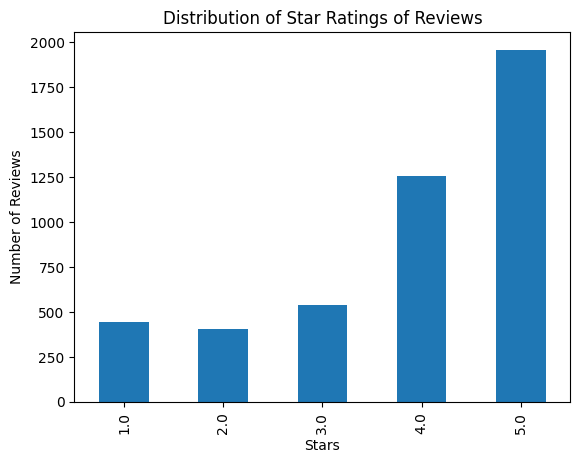

In [4]:
# plot the distribution of the star ratings of reviews
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Star Ratings of Reviews')
plt.show()

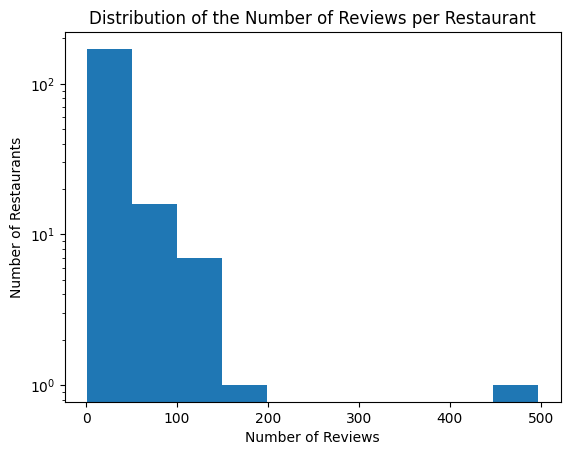

In [5]:
# plot the distribution of the number of reviews per restaurant
# log distribution
df['business_id'].value_counts().plot(kind='hist', logy=True)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of the Number of Reviews per Restaurant')
plt.show()

[nltk_data] Downloading package stopwords to /Users/peter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


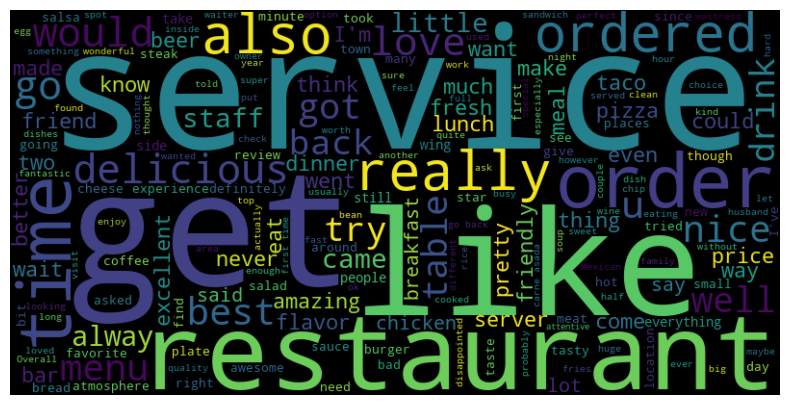

In [8]:
# create a plot of the most common words excluding stop words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from wordcloud import WordCloud
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(["food", "good", "place", "tucson", "one"])

# work word cloud
text = df['text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Provide statistics and discuss a basic exploration of (a portion of) your dataset. Your goal should be to bring your reader from knowing nothing about your dataset to having a good feel for it and how you're going to use it.  This should be 2-3 paragraphs long and include at least 2 plots and a few examples.  At this point you need to demonstrate that dataset you are proposing is feasible to use: this means you only need a sample of the final data, but that sample has to be of a non-trivial size and should reflect properties of the final data.

The tucson restaurants yelp dataset contains information about 288K reviews of restaurants in the Tucson, AZ area. The dataset contains 22 columns, including the restaurant name, the number of stars given in the review, the date of the review, and the text of the review. When looking at a subset of 4601 reviews only, we can see that the average number of stars given in the review is 3.84, with a standard deviation of 1.32. The distribution of the number of stars given in the review is shown in the histogram below. The number of reviews per restaurant is shown in the second histogram. The distribution of the number of reviews per restaurant is left-skewed, with a long tail of restaurants with over 500 reviews.

We will be exploring comparison words in the reviews. Performing a wordcloud on the reviews, we can see that the most after removing some overly common words such as "food", "good", "place", "Tucson" and "one", we can see that most of the reviews talk about the service, their order, certain food items, and their table. We can use this information to compare the reviews of different restaurants and produce a similarity metric to recommend restaurants to users.